In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname("__file__")), '..'))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from utils import data_handling, model_assessment
from ipywidgets import interact

### Setup visualization settings

In [2]:
plt.style.use('seaborn-paper')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['legend.handlelength'] = 2.0
minor_locator = AutoMinorLocator(4)

### Assess and visualize classification models' accuracy, precision, recall, and F1-score 

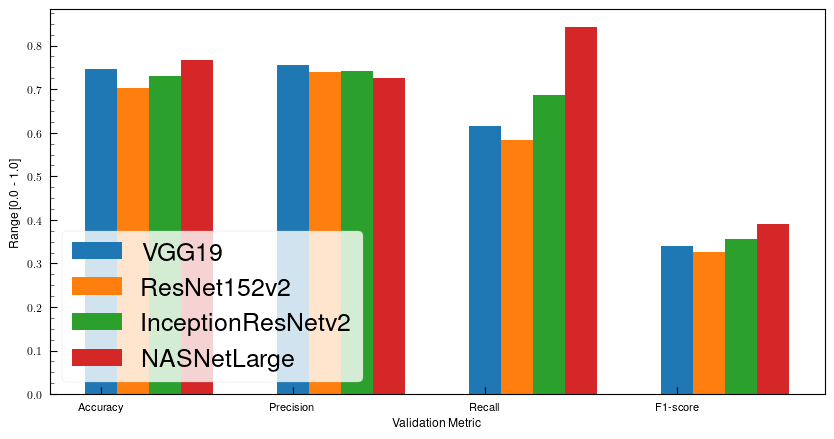

In [3]:
results_VGG19 = [0.7463, 0.7563, 0.6164]
results_VGG19.append(model_assessment.compute_F1_score(results_VGG19[1], results_VGG19[2]))

results_ResNet152v2 =  [0.7015, 0.7402, 0.5839]
results_ResNet152v2.append(model_assessment.compute_F1_score(results_ResNet152v2[1], results_ResNet152v2[2]))

results_InceptionResNetv2 = [0.7313, 0.7417, 0.6871]
results_InceptionResNetv2.append(model_assessment.compute_F1_score(\
    results_InceptionResNetv2[1], results_InceptionResNetv2[2]))

results_NASNetLarge = [0.7672, 0.7263, 0.8415]
results_NASNetLarge.append(model_assessment.compute_F1_score(\
    results_NASNetLarge[1], results_NASNetLarge[2]))

results = [results_VGG19, results_ResNet152v2, results_InceptionResNetv2, results_NASNetLarge]

fig, axs = plt.subplots(1, 1, figsize = (10,5))
model_name = ['VGG19', 'ResNet152v2', 'InceptionResNetv2', 'NASNetLarge']
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for i in range(4):
    width = 0.5
    xposition = [0.0 + i * width, 3.0 + i * width, 6.0 + i * width, 9.0 + i * width]
    rects = axs.bar(xposition, results[i], width, label = model_name[i])


xposition = [0.0, 3.0, 6.0, 9.0]
plt.xticks(xposition, labels)
axs.set_xlabel('Validation Metric')
axs.set_ylabel('Range [0.0 - 1.0]')
axs.yaxis.set_minor_locator(minor_locator)
axs.legend(model_name, loc = 'lower left')
plt.show()

### Load and prepare test data

In [4]:
cell_images, cell_labels, cell_types = data_handling.load_data_from_file('../data/labels.csv')

train_test_split = int(0.85 * cell_images.shape[0])
X_test, Y_test, Z_test = \
    cell_images[train_test_split : ], \
    cell_labels[train_test_split : ], cell_types[train_test_split : ]
X_test, Y_test, Z_test = data_handling.preprocess_data(X_test, Y_test, Z_test)

### Assess and visualize ROC curve and AUC

### Assess and visualize confusion matrix

13/13 [==============================] - 6s 272ms/step


c:\ProgramData\Anaconda3\envs\tensorflow_latest\lib\site-packages\keras\layers\core\lambda_layer.py:303: UserWarning: keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


13/13 [==============================] - 12s 473ms/step


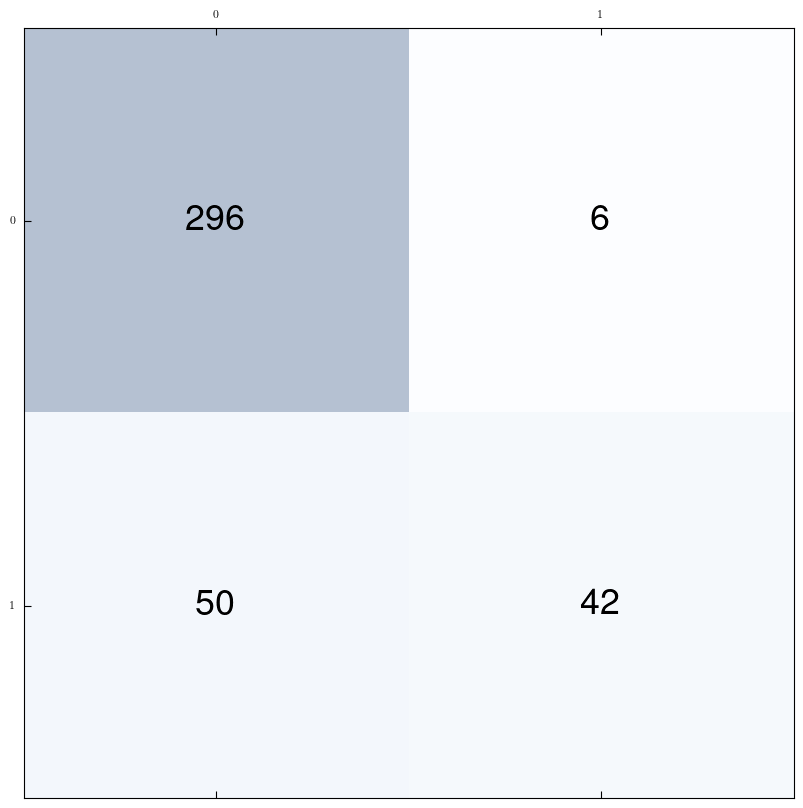

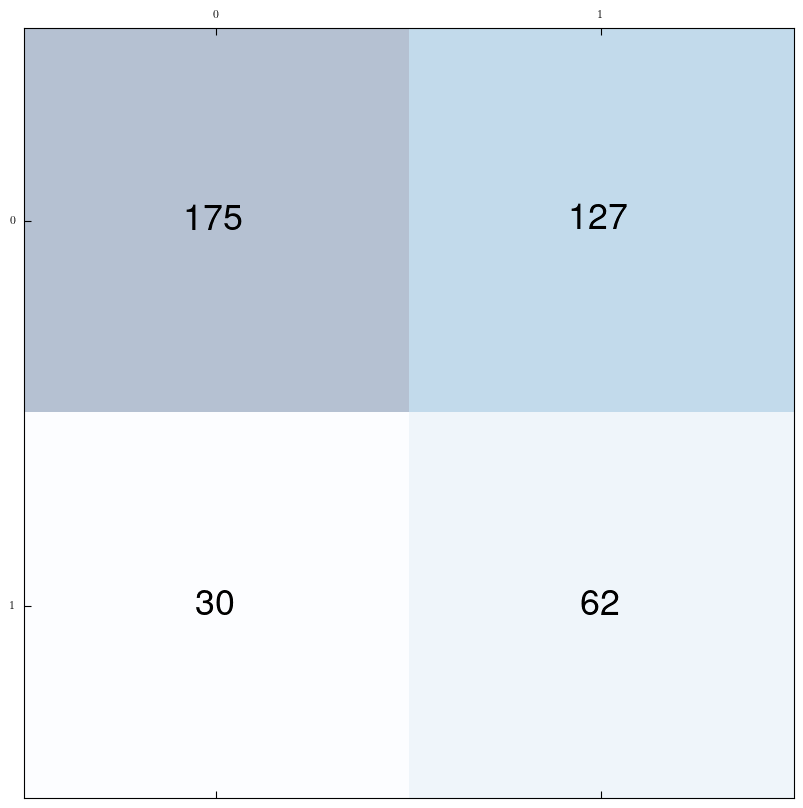

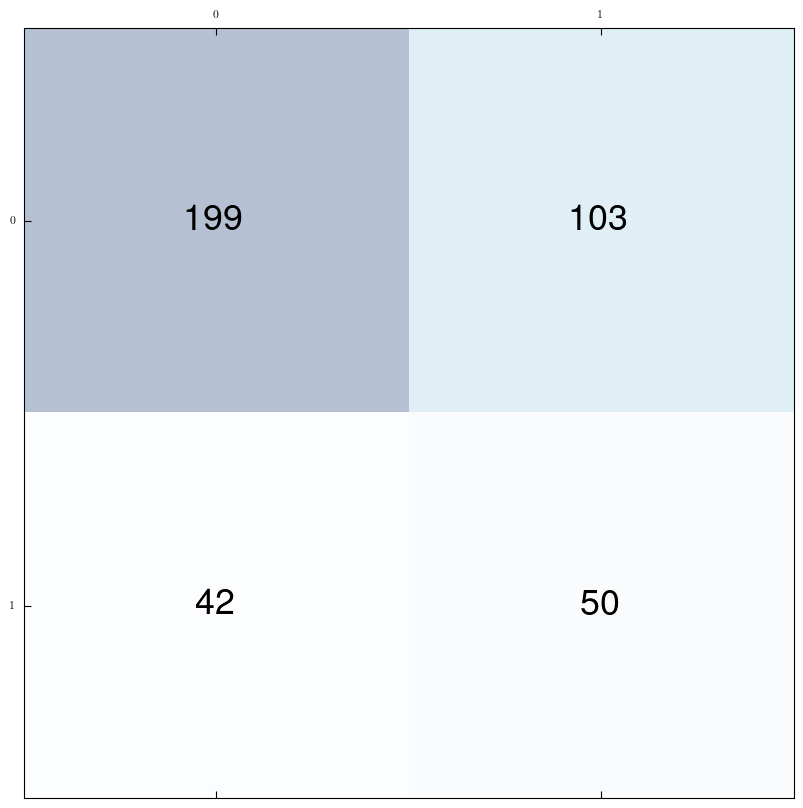

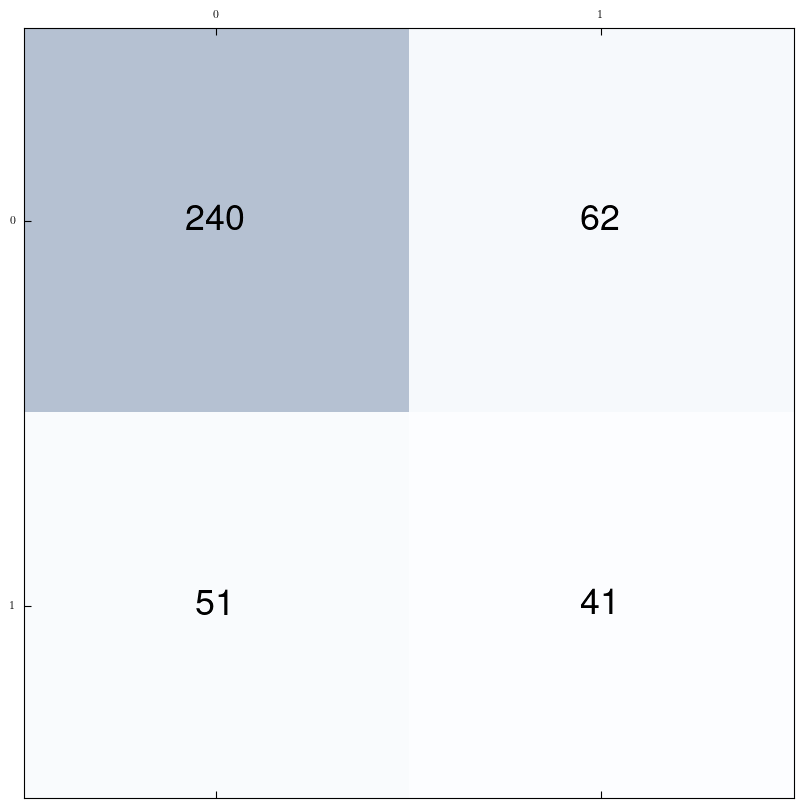

In [5]:
defect_probability = 0.3333333333333333
VGG19_cm = model_assessment.compute_confusion_matrix(\
    '../models/weights/VGG19_1.00.00_ss.hdf5', X_test, Y_test, defect_probability)
RestNet152v2_cm = model_assessment.compute_confusion_matrix(\
    '../models/weights/ResNet152v2_1.00.00_ss.hdf5', X_test, Y_test, defect_probability)
InceptionResNetv2_cm = model_assessment.compute_confusion_matrix(\
    '../models/weights/InceptionResNetv2_1.00.00_ss.hdf5', X_test, Y_test, defect_probability)
NasNetLarge_cm = \
    model_assessment.compute_confusion_matrix('../models/weights/NasNetLarge_1.00.00_ss.hdf5', X_test, Y_test, defect_probability)

fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(VGG19_cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(VGG19_cm.shape[0]):
    for j in range(VGG19_cm.shape[1]):
        ax.text(x = j, y = i,s = VGG19_cm[i, j], va = 'center', ha = 'center', size = 'xx-large')

fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(RestNet152v2_cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(RestNet152v2_cm.shape[0]):
    for j in range(RestNet152v2_cm.shape[1]):
        ax.text(x = j, y = i,s = RestNet152v2_cm[i, j], va = 'center', ha = 'center', size = 'xx-large')

fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(InceptionResNetv2_cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(InceptionResNetv2_cm.shape[0]):
    for j in range(InceptionResNetv2_cm.shape[1]):
        ax.text(x = j, y = i,s = InceptionResNetv2_cm[i, j], va = 'center', ha = 'center', size = 'xx-large')

fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(NasNetLarge_cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(NasNetLarge_cm.shape[0]):
    for j in range(NasNetLarge_cm.shape[1]):
        ax.text(x = j, y = i,s = NasNetLarge_cm[i, j], va = 'center', ha = 'center', size = 'xx-large')  